<a href="https://colab.research.google.com/github/Noriega402/inmersion_en_datos/blob/main/inmersion_en_datos_aula_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primeros pasos con inmersion de datos

1. Montamos nuestra carpeta de drive

In [60]:
from google.colab import drive #importar mi cuenta de drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Leemos las primeras lineas del archivo .csv

In [61]:
import pandas as pd # importando libreria pandas

datos = pd.read_csv('/content/drive/MyDrive/inmersion_datos/inmuebles.csv') # leer nuestro archivo .csv
datos.head()

,Tipo,Descripcion,Localizacion,Atributos,Valor
0,Apartamento,Apartamento en venta en Zona Noroccidental,"Zona Noroccidental, Bogotá D.C, Cundinamarca",3 habitaciones2 baños70 m²,360000000
1,Casa,Casa en venta en Castilla,"Castilla, Kennedy, Zona Suroccidental, Bogotá ...",4 habitaciones3 baños170 m²,670000000
2,Apartamento,Apartamento en venta en Chico Reservado,"Chico Reservado, Chapinero, Zona Chapinero, Bo...",3 habitaciones3 baños144 / 144 m²,1120000000
3,Apartamento,Apartamento en venta en Usaquén,"Usaquén, Zona Norte, Bogotá D.C, Cundinamarca",3 habitaciones2 baños154 / 134 m²,890000000
4,Apartamento,Apartamento en venta en Bella Suiza,"Bella Suiza, Usaquén, Zona Norte, Bogotá D.C, ...",2 habitaciones3 baños128 m²,970000000


In [50]:
datos.shape #filas y columnas (el index de cada tupla no entra aca)

(9520, 5)

In [51]:
datos.columns ## ver los nombres de las columnas

Index(['Tipo', 'Descripcion', 'Localizacion', 'Atributos', 'Valor'], dtype='object')

4. Podemos crear un diccionario para las columnas

In [62]:
#los diccionarios tiene un conjunto de llave: valor
columnas = {'Tipo':'type','Descripcion':'description','Localizacion': 'location','Atributos':'attributes','Valor':'value'}
datos = datos.rename(columns=columnas) ##cambio de nombre de las columnas
datos.sample(5) # devuelve un numero de filas al azar

,type,description,location,attributes,value
1546,Casa,Casa en venta en Suba,"Suba, Zona Noroccidental, Bogotá D.C, Cundinam...",4 habitaciones6 baños425 m²,3300000000
4700,Casa,Casa en venta en Barrios Unidos,"Barrios Unidos, Zona Chapinero, Bogotá D.C, Cu...",3 habitaciones4 baños190 m²,897000000
4572,Apartamento,Apartamento en venta en Barrios Unidos,"Barrios Unidos, Zona Chapinero, Bogotá D.C, Cu...",3 habitaciones2 baños49 m²,100000000
662,Apartamento,Apartamento en venta en Santa Barbara,"Santa Barbara, Usaquén, Zona Norte, Bogotá D.C...",1 habitación1 baño45 m²,250000000
2280,Casa,Casa en venta en Usaquén,"Usaquén, Zona Norte, Bogotá D.C, Cundinamarca",2 habitaciones2 baños82 m²,455000000


In [40]:
datos.info() # ver la informacion del archivo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   type         9520 non-null   object
 1   description  9520 non-null   object
 2   location     9520 non-null   object
 3   attributes   9520 non-null   object
 4   value        9520 non-null   object
dtypes: object(5)
memory usage: 372.0+ KB


In [41]:
datos.iloc[200] # devuelve la informacionde un indice

type                                                 Apartamento
description                  Apartamento en venta en El Contador
location       El Contador, Usaquén, Zona Norte, Bogotá D.C, ...
attributes                       3 habitaciones3 baños90 / 90 m²
value                                                460.000.000
Name: 200, dtype: object

In [147]:
datos.iloc[200:205] #devuelve los datos dentro de un rango
#datos['value'].iloc[200]

,type,description,location,attributes,value
200,Apartamento,Apartamento en venta en El Contador,"El Contador, Usaquén, Zona Norte, Bogotá D.C, ...",3 habitaciones3 baños90 / 90 m²,460000000
201,Apartamento,Apartamento en venta en Cedritos,"Cedritos, Usaquén, Zona Norte, Bogotá D.C, Cun...",2 habitaciones1 baño52 m²,225000000
202,Apartamento,Apartamento en venta en Rafael Uribe Uribe,"Rafael Uribe Uribe, Zona Sur, Bogotá D.C, Cund...",3 habitaciones2 baños58 m²,200000000
203,Apartamento,Apartamento en venta en Zona Noroccidental,"Zona Noroccidental, Bogotá D.C, Cundinamarca",2 habitaciones2 baños50 m²,234000000
204,Apartamento,Apartamento en venta en Zona Noroccidental,"Zona Noroccidental, Bogotá D.C, Cundinamarca",4 habitaciones2 baños73 m²,199000000


In [54]:
# hacer un rango de datos  con bucle for
for i in range(200, 205):
    print(datos['description'][i] + ' | ' + datos['value'][(i)])

Apartamento en venta en El Contador | $$ 460.000.000
Apartamento en venta en Cedritos | $$ 225.000.000
Apartamento en venta en Rafael Uribe Uribe | $$ 200.000.000
Apartamento en venta en Zona Noroccidental | $$ 234.000.000
Apartamento en venta en Zona Noroccidental | $$ 199.000.000


In [55]:
# promedio del costo de los inmuebles
datos.columns

Index(['type', 'description', 'location', 'attributes', 'value'], dtype='object')

In [63]:
import statistics
datos.value.mean()

602062353.527626

In [64]:
datos.sample(100)

,type,description,location,attributes,value
9203,Casa,Casa en venta en Ciudad Bolívar,"Ciudad Bolívar, Zona Sur, Bogotá D.C, Cundinam...",5 habitaciones5 baños144 m²,265000000
5699,Apartamento,Apartamento en venta en Chico Norte,"Chico Norte, Chapinero, Zona Chapinero, Bogotá...",3 habitaciones3 baños186 / 186 m²,1800000000
4306,Apartamento,Apartamento en venta en Barrios Unidos,"Barrios Unidos, Zona Chapinero, Bogotá D.C, Cu...",3 habitaciones2 baños72 m²,380000000
2888,Apartamento,Apartamento en venta en Bosa,"Bosa, Zona Suroccidental, Bogotá D.C, Cundinam...",3 habitaciones1 baño56 m²,150000000
6644,Apartamento,Apartamento en venta en Mazuren,"Mazuren, Suba, Zona Noroccidental, Bogotá D.C,...",3 habitaciones3 baños92 m²,372000000
...,...,...,...,...,...
921,Apartamento,Apartamento en venta en Cantagallo,"Cantagallo, Suba, Zona Noroccidental, Bogotá D...",3 habitaciones2 baños65 / 65 m²,350000000
5970,Apartamento,Apartamento en venta en Santa Barbara,"Santa Barbara, Usaquén, Zona Norte, Bogotá D.C...",3 habitaciones4 baños180 m²,720000000
9285,Apartamento,Apartamento en venta en Kennedy,"Kennedy, Zona Suroccidental, Bogotá D.C, Cundi...",3 habitaciones2 baños63 m²,285000000
6691,Casa,Casa en venta en Zona Noroccidental,"Zona Noroccidental, Bogotá D.C, Cundinamarca",4 habitaciones4 baños240 m²,1050000000


In [93]:
# ver el valor maximo y minimo de un inmueble
max = datos['value'].max()
min = datos['value'].min()
print("El valor maximo de un inmueble es: $ " + str(max))
print("El valor minimo de un inmueble es: $ " + str(min))

El valor maximo de un inmueble es: $16000000000
El valor minimo de un inmueble es: $60000000


In [76]:
#contar el numero de inmuebles de esta localizacion
sum((datos.location == 'Zona Noroccidental, Bogotá D.C, Cundinamarca'))

877

In [85]:
inmuebles_santa_barbara = (datos.location == 'Santa Barbara, Usaquén, Zona Norte, Bogotá D.C, Cundinamarca')

In [86]:
# inmuebles que se encunetran dentro de la localizacion exacte de santa barbara ...
resultados_santa_barbara = datos[inmuebles_santa_barbara]
resultados_santa_barbara 

,type,description,location,attributes,value
46,Apartamento,Apartamento en venta en Santa Barbara,"Santa Barbara, Usaquén, Zona Norte, Bogotá D.C...",3 habitaciones1 baño101 m²,565000000
75,Apartamento,Apartamento en venta en Santa Barbara,"Santa Barbara, Usaquén, Zona Norte, Bogotá D.C...",3 habitaciones1 baño101 m²,565000000
99,Apartamento,Apartamento en venta en Santa Barbara,"Santa Barbara, Usaquén, Zona Norte, Bogotá D.C...",3 habitaciones3 baños114 / 114 m²,510000000
108,Apartamento,Apartamento en venta en Santa Barbara,"Santa Barbara, Usaquén, Zona Norte, Bogotá D.C...",1 habitación2 baños69 / 69 m²,425000000
117,Apartamento,Apartamento en venta en Santa Barbara,"Santa Barbara, Usaquén, Zona Norte, Bogotá D.C...",2 habitaciones3 baños85 / 85 m²,519000000
...,...,...,...,...,...
9350,Apartamento,Apartamento en venta en Santa Barbara,"Santa Barbara, Usaquén, Zona Norte, Bogotá D.C...",2 habitaciones2 baños70 m²,460000000
9356,Apartamento,Apartamento en venta en Santa Barbara,"Santa Barbara, Usaquén, Zona Norte, Bogotá D.C...",1 habitación1 baño51 / 51 m²,330000000
9397,Apartamento,Apartamento en venta en Santa Barbara,"Santa Barbara, Usaquén, Zona Norte, Bogotá D.C...",3 habitaciones3 baños93 m²,700000000
9419,Apartamento,Apartamento en venta en Santa Barbara,"Santa Barbara, Usaquén, Zona Norte, Bogotá D.C...",3 habitaciones3 baños155 m²,700000000


In [96]:
descripciones_inmuebles = datos.description.value_counts() # contar el numero de veces que aparecen las descripciones
localizacion_inmuebles = datos.location.value_counts() # contar el numero de veces que aparecen las localizaciones
atributos_inmuebles = datos.attributes.value_counts() # contar el numero de veces que aparecen los atributos

In [98]:
descripciones_inmuebles

Apartamento en venta en Usaquén               916
Apartamento en venta en Zona Noroccidental    634
Apartamento en venta en Cedritos              501
Apartamento en venta en Bosa                  499
Apartamento en venta en Kennedy               392
                                             ... 
Edificio en venta en Santa Barbara              1
Local en venta en Chico Reservado               1
Casa en venta en Timiza                         1
Edificio en venta en Barrios Unidos             1
Local en venta en Las Delicias                  1
Name: description, Length: 316, dtype: int64

In [101]:
len(descripciones_inmuebles) # tamaño total de las descripciones

316

In [99]:
localizacion_inmuebles

Usaquén, Zona Norte, Bogotá D.C, Cundinamarca                          1105
Zona Noroccidental, Bogotá D.C, Cundinamarca                            877
Bosa, Zona Suroccidental, Bogotá D.C, Cundinamarca                      589
Kennedy, Zona Suroccidental, Bogotá D.C, Cundinamarca                   589
Cedritos, Usaquén, Zona Norte, Bogotá D.C, Cundinamarca                 554
                                                                       ... 
Colinas De Suba, Suba, Zona Noroccidental, Bogotá D.C, Cundinamarca       1
La Estanzuela, Suba, Zona Noroccidental, Bogotá D.C, Cundinamarca         1
Roma, Bosa, Zona Suroccidental, Bogotá D.C, Cundinamarca                  1
Alameda, Los Mártires, Zona Centro, Bogotá D.C, Cundinamarca              1
Prado Veraniego, Suba, Zona Noroccidental, Bogotá D.C, Cundinamarca       1
Name: location, Length: 149, dtype: int64

In [102]:
len(localizacion_inmuebles)

149

In [100]:
atributos_inmuebles

3 habitaciones1 baño47 m²            187
3 habitaciones1 baño48 m²             74
3 habitaciones2 baños70 m²            58
3 habitaciones2 baños62 m²            51
3 habitaciones2 baños64 m²            51
                                    ... 
2 habitaciones2 baños68 / 65 m²        1
4 habitaciones3 baños149 m²            1
5 habitaciones4 baños176 m²            1
3 habitaciones3 baños120 / 102 m²      1
3 habitaciones2 baños183 m²            1
Name: attributes, Length: 2753, dtype: int64

In [103]:
len(atributos_inmuebles)

2753

In [169]:
tipo = 'Casa'
tipo_inmueble = sum((datos['type'] == tipo)) # contar los inmuebles de algun tipo
print("Hay un total de " + str(tipo_inmueble) + " inmuebles de tipo " + tipo)

Hay un total de 2043 inmuebles de tipo Casa


# Generando graficos para mis datos



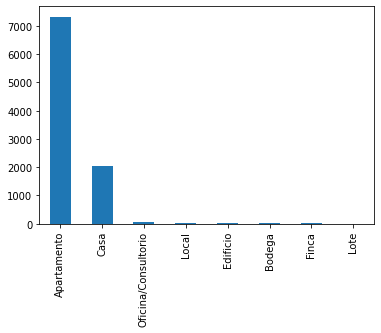

In [126]:
inmuebles = datos.type.value_counts() # contar el tipo de inmuebles que hay
inmuebles.plot.bar(); # generando grafico de barras

<Axes: >

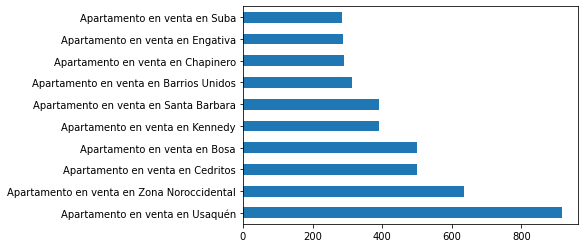

In [132]:
descripciones_inmuebles.head(10).plot.barh()

<Axes: ylabel='type'>

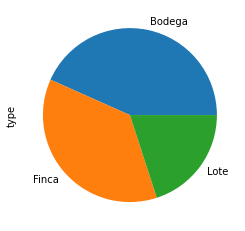

In [142]:
inmuebles.tail(3).plot.pie() # tipos de inmuebles para menos venta

**Desafio**
Calcular la media, mediana y moda

In [165]:
import statistics
datos_ordenados = sorted(datos['value'])
mediana = statistics.median(datos_ordenados)
media =  statistics.mean(datos_ordenados)
moda = statistics.mode(datos_ordenados)

print('Media: ' + str(media))
print('Mediana: ' + str(mediana))
print('Moda: ' + str(moda))

Media: 602062353.527626
Mediana: 409182500.0
Moda: 450000000


In [181]:
# traer el inmueble de un tipo con el valor max y min
ver_tipo = "Bodega"
obtener = datos['type'] == ver_tipo
res = datos[obtener] # traer resultados de un inmueble
sum(res.value_counts()) ## obtener valor del tipo de inmueble
valor_min = res.min()
valor_max = res.max()
print('Valor minimo de tipo ' + ver_tipo)
print(valor_min)
print('')
print('Valor maximo de tipo ' + ver_tipo)
print(valor_max)

Valor minimo de tipo Bodega
type                                                      Bodega
description                           Bodega en venta en Bochica
location       Bochica, Suba, Zona Noroccidental, Bogotá D.C,...
attributes                      1 habitación4 baños1200 / 450 m²
value                                                  120000000
dtype: object

Valor maximo de tipo Bodega
type                                                      Bodega
description                      Bodega en venta en San Patricio
location       San Patricio, Usaquén, Zona Norte, Bogotá D.C,...
attributes                           5 habitaciones2 baños158 m²
value                                                 2800000000
dtype: object
